PHASE 1 — Import du dataset et première visualisation

In [1]:
import pandas as pd

dt = pd.read_csv("../data/customers.csv")

Première visualisation (Infos générales et Statistiques descriptives)

In [2]:
dt.head()

,customer_id,age,gender,income,city,category,amount,frequency,last_purchase_days_ago,churn
0,1,56,Female,49552,Paris,Electronics,979.55,14,164,0
1,2,69,Male,109245,Toulouse,Beauty,59.28,7,259,0
2,3,46,Female,49055,Marseille,Sports,505.15,9,314,0
3,4,32,Female,55685,Nice,Home,821.70,9,216,0
4,5,60,Male,91965,Paris,Beauty,566.48,1,183,1


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1500 non-null   int64  
 1   age                     1500 non-null   int64  
 2   gender                  1500 non-null   object 
 3   income                  1500 non-null   int64  
 4   city                    1500 non-null   object 
 5   category                1500 non-null   object 
 6   amount                  1500 non-null   float64
 7   frequency               1500 non-null   int64  
 8   last_purchase_days_ago  1500 non-null   int64  
 9   churn                   1500 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 117.3+ KB


In [4]:
dt.describe()

,customer_id,age,income,amount,frequency,last_purchase_days_ago,churn
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,43.732000,67737.187333,989.454267,7.594000,183.072667,0.090000
std,433.157015,15.071771,29430.013395,581.027337,4.116689,103.964634,0.286277
min,1.000000,18.000000,18138.000000,11.250000,1.000000,1.000000,0.000000
25%,375.750000,31.000000,41461.250000,483.715000,4.000000,90.000000,0.000000
50%,750.500000,44.000000,67772.000000,989.570000,8.000000,184.000000,0.000000
75%,1125.250000,56.000000,93452.250000,1473.255000,11.000000,270.000000,0.000000
max,1500.000000,69.000000,119665.000000,1999.700000,14.000000,364.000000,1.000000


Verifier les valeurs manquante 

In [5]:
dt.isnull().sum()

customer_id               0
age                       0
gender                    0
income                    0
city                      0
category                  0
amount                    0
frequency                 0
last_purchase_days_ago    0
churn                     0
dtype: int64

PHASE 2 — Première analyse (Top 10 des pays par volume de ventes )

In [8]:
dt["city"].value_counts().head(10)

city
Paris        313
Nice         309
Marseille    305
Toulouse     291
Lyon         282
Name: count, dtype: int64

Chiffre d'affaires par ville :

In [9]:
dt.groupby("city")["income"].sum().sort_values(ascending=False).head(10)

city
Paris        21008643
Nice         20904975
Toulouse     20494848
Marseille    20273227
Lyon         18924088
Name: income, dtype: int64

Quantité vendue par secteur :

In [10]:
dt.groupby("category")["amount"].sum().sort_values(ascending=False).head(10)

category
Fashion        325995.72
Sports         297153.87
Beauty         295462.51
Home           292380.01
Electronics    273189.29
Name: amount, dtype: float64

Definir la target : possibilité de retour d'un client

In [11]:
dt["target"] = (dt["last_purchase_days_ago"] < 60).astype(int)

Analyse de la target :

In [12]:
dt['target'].value_counts(normalize=True)

target
0    0.841333
1    0.158667
Name: proportion, dtype: float64

Visualisation de la target :

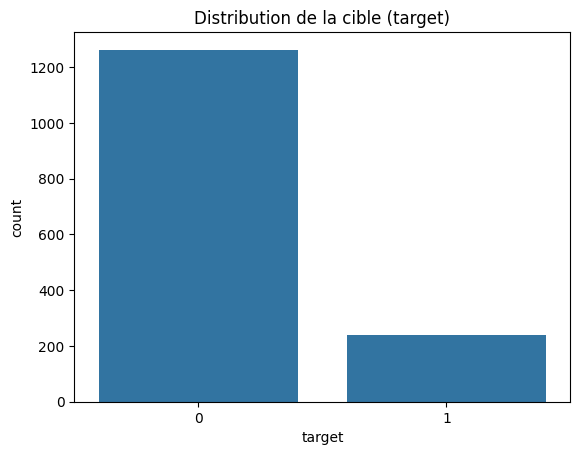

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dt, x='target')
plt.title("Distribution de la cible (target)")
plt.show()


Analyse démographique : âge et revenu

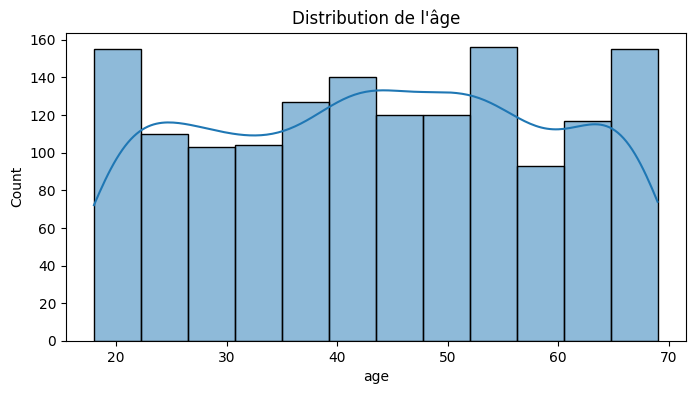

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(dt['age'], kde=True)
plt.title("Distribution de l'âge")
plt.show()

Income distribution

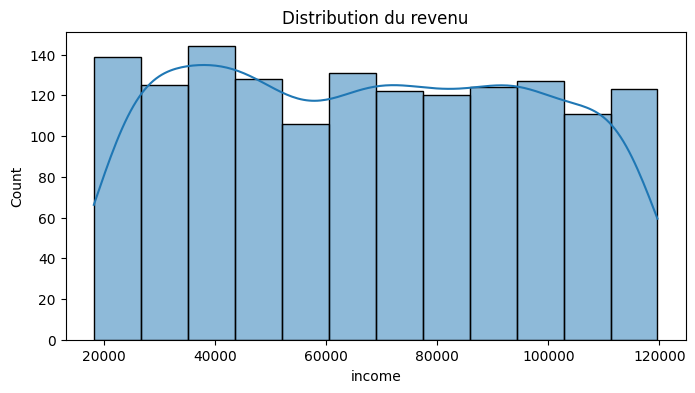

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(dt['income'], kde=True)
plt.title("Distribution du revenu")
plt.show()

Analyse du montant dépensé

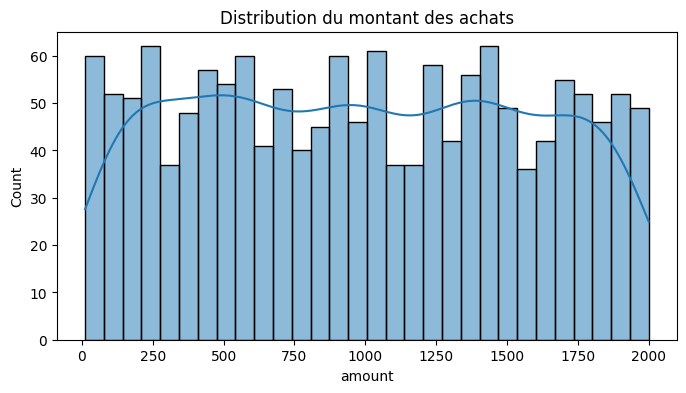

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(dt['amount'], kde=True, bins=30)
plt.title("Distribution du montant des achats")
plt.show()

Analyse du comportement d’achat : Fréquence d’achat

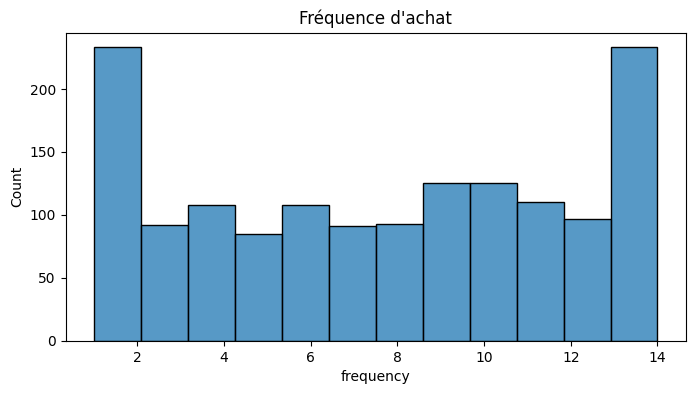

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(dt['frequency'], kde=False)
plt.title("Fréquence d'achat")
plt.show()


Dernier achat (days ago)

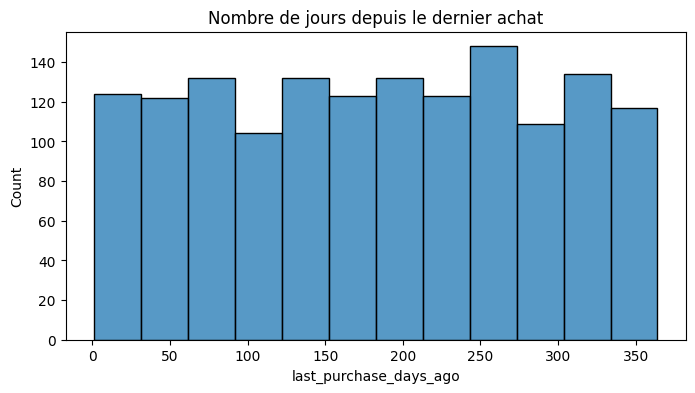

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(dt['last_purchase_days_ago'], kde=False)
plt.title("Nombre de jours depuis le dernier achat")
plt.show()


Analyse catégorielle : Répartition par genre

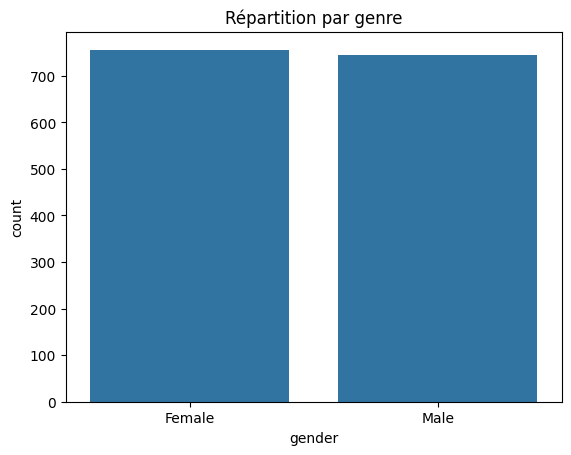

In [27]:
sns.countplot(data=dt, x='gender')
plt.title("Répartition par genre")
plt.show()


Répartition par ville

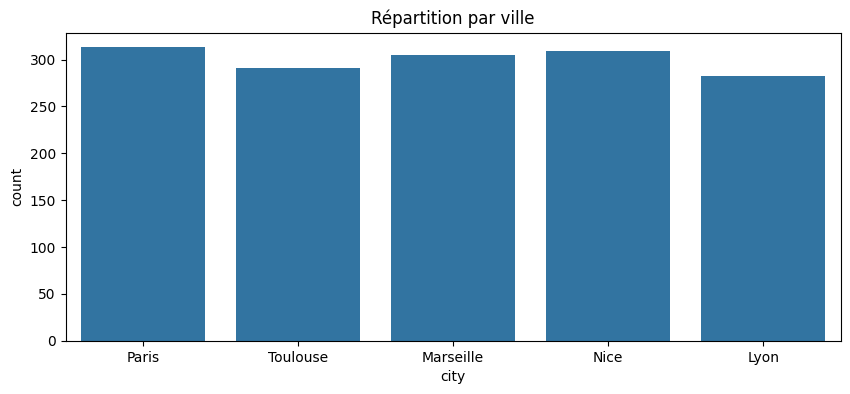

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(data=dt, x='city')
plt.title("Répartition par ville")
plt.show()


Répartition par catégorie d’achat

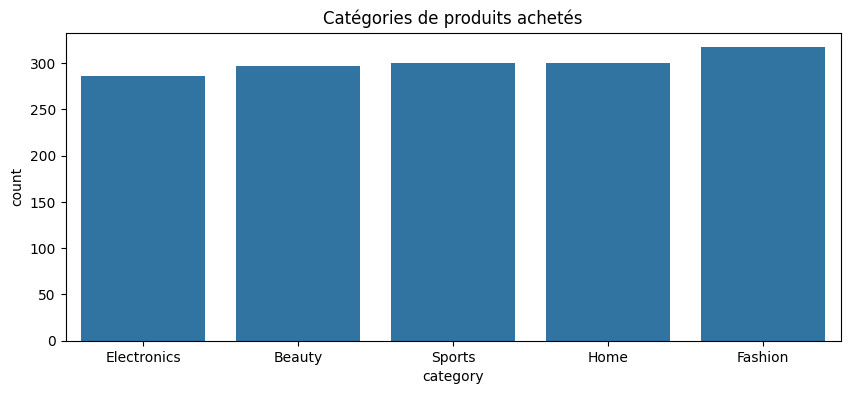

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(data=dt, x='category')
plt.title("Catégories de produits achetés")
plt.show()

Relation entre features et target : Age vs Return

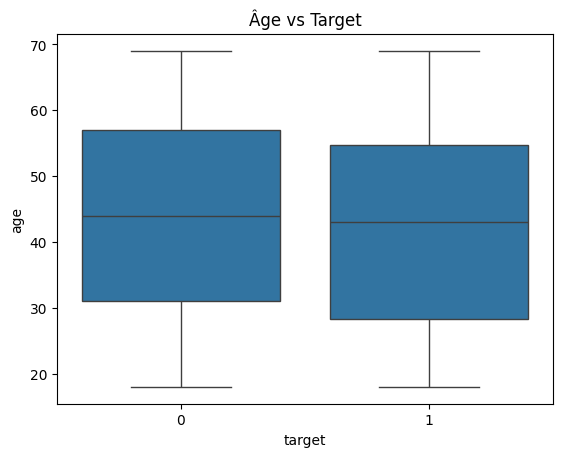

In [30]:
sns.boxplot(data=dt, x='target', y='age')
plt.title("Âge vs Target")
plt.show()

Income vs Return

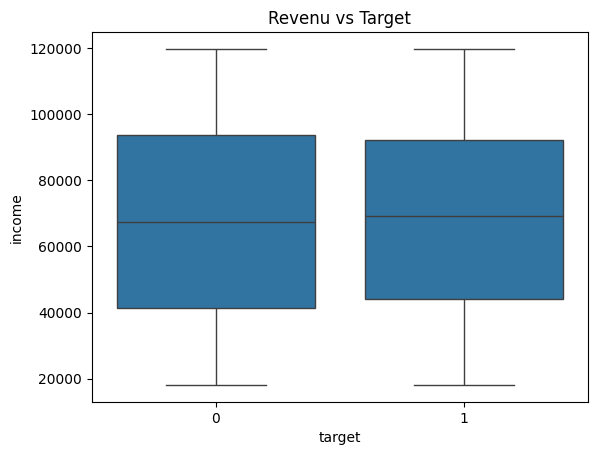

In [31]:
sns.boxplot(data=dt, x='target', y='income')
plt.title("Revenu vs Target")
plt.show()

Amount vs Return

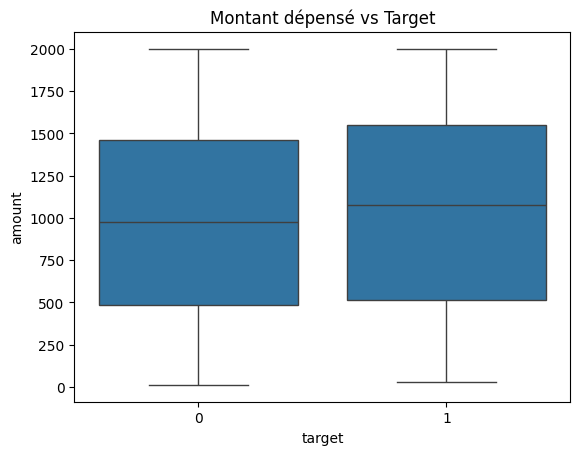

In [32]:
sns.boxplot(data=dt, x='target', y='amount')
plt.title("Montant dépensé vs Target")
plt.show()

Frequency vs Return

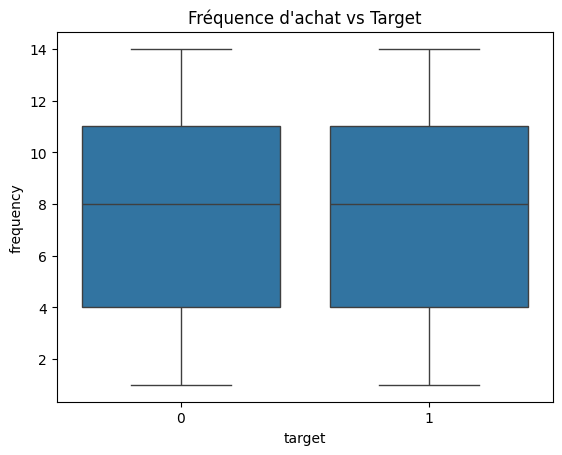

In [33]:
sns.boxplot(data=dt, x='target', y='frequency')
plt.title("Fréquence d'achat vs Target")
plt.show()

Analyse des corrélations

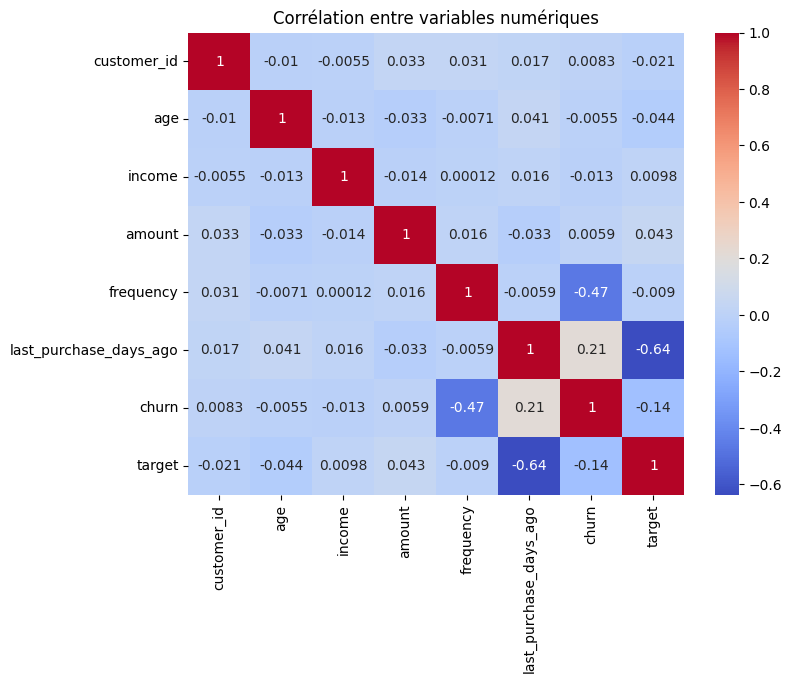

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(dt.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre variables numériques")
plt.show()

PHASE 3 — Préparation du dataset : Séparer features & target

In [37]:
y = dt["target"]
X = dt.drop(columns=["target", "customer_id"])  # customer_id pas utile au ML
X.head()

,age,gender,income,city,category,amount,frequency,last_purchase_days_ago,churn
0,56,Female,49552,Paris,Electronics,979.55,14,164,0
1,69,Male,109245,Toulouse,Beauty,59.28,7,259,0
2,46,Female,49055,Marseille,Sports,505.15,9,314,0
3,32,Female,55685,Nice,Home,821.70,9,216,0
4,60,Male,91965,Paris,Beauty,566.48,1,183,1


Identifier les colonnes numériques vs catégorielles

In [38]:
num_cols = ["age", "income", "amount", "frequency", "last_purchase_days_ago"]
cat_cols = ["gender", "city", "category"]

Création pipeline numerique

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

Création pipeline categorielle

In [40]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", OneHotEncoder(handle_unknown="ignore"))
])

Création Colonne Transformers

In [41]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols),
    ]
)

Split train/test

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

PHASE 4 — Entraîner plusieurs modèles

1. Logistic Regression et Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)


print("Logistic Regression:\n")
print(classification_report(y_test, lr_pred))

2. Random Forest et Evaluation 

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest:\n")
print(classification_report(y_test, rf_pred))

Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        45

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



3. Gradient Boosting et Evaluation

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GradientBoostingClassifier())
])

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting:\n")
print(classification_report(y_test, gb_pred))

Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00        45

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Sauvegarde du meilleur modèle (RF_Model = à GB_Model)

In [ ]:
import joblib

joblib.dump(rf_model, "../models/best_model.pkl")